## Центральная предельная теорема своими руками

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2
from scipy.stats import norm
%matplotlib inline

Рассмотрим распределение хи-квадрат $\chi^2_k$, имеющее параметр $k$. Математическое ожидание такого распределения будет равно $k$, а дисперсия $2k$.

In [2]:
# параметр распределения chi2
k = 3

Сгенерируем из этого распределения выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины.

In [3]:
# данные для графика плотности вероятности
x = np.linspace(chi2.ppf(0.01, k), chi2.ppf(0.99, k), 100)
pdf = chi2.pdf(x, k)

# данные для гистограммы выборки
random = chi2.rvs(k, size=1000)

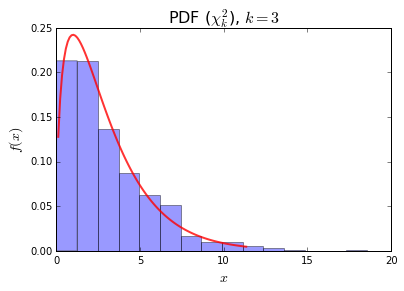

In [4]:
plt.hist(random, normed=True, alpha=0.4, bins=15)
plt.plot(x, pdf, 'r-', lw=2, alpha=0.8)
plt.title("PDF ($\chi^2_k$), $k=3$", fontsize=16)
plt.ylabel('$f(x)$', fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.show()

Оценим распределение выборочного среднего случайной величины при разных объёмах выборок. Для этого при разных значениях n сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних, а поверх гистограммы нарисуем плотность соответствующего нормального распределения.

По центральной предельной теореме распределение выборочных средних будет приближаться нормальным распределением $N\left( EX, \frac{DX}{n}\right)$, параметры которого мы можем вычислить, используя теоретические значения среднего и дисперсии случайной величины:

In [5]:
EX = k
DX = 2*k

Зададим вспомогательные функции: 

Эта функция генерирует выборки объема n и считает их выборочные средние:

In [6]:
def create_sample(n, size=1000):
    sample = np.zeros(size)
    for i in np.arange(0, size):
        random = chi2.rvs(k, size=n)
        sample[i] = np.mean(random)

    return sample

Вторая функция для заданного объема выборки n строит гистограмму выборочных средних и график функции плотности нормального распределения с вычисленными параметрами: 

In [7]:
def simulate_data(n): 
    # нормальное распределение
    mu = EX
    sigma = math.sqrt(DX/float(n))
    norm_rv = sts.norm(loc=mu, scale=sigma)

    # данные для графика плотности вероятности норм.распр.
    x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 100)
    pdf = norm_rv.pdf(x)

    # данные для гистограммы выборочных средних
    sample = create_sample(n)
    
    plt.hist(sample, alpha=0.4, bins=20, normed=True)
    plt.plot(x, pdf, 'r-', lw=2, alpha=0.8)
    plt.title("$N\sim({}, {:.5})$), $n={}$".format(mu, sigma*sigma, n), fontsize=16)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$f(x)$', fontsize=14)
    plt.show()

    print "Параметры нормального распределения:"
    print "mu =", mu
    print "sigma =", sigma
    print "variance =", sigma*sigma

Проведем эксперимент для разных значений n.

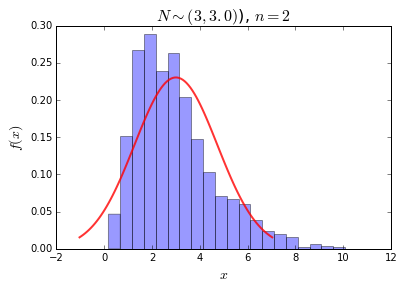

Параметры нормального распределения:
mu = 3
sigma = 1.73205080757
variance = 3.0


In [8]:
simulate_data(2)

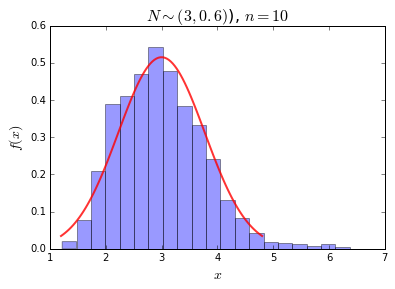

Параметры нормального распределения:
mu = 3
sigma = 0.774596669241
variance = 0.6


In [9]:
simulate_data(10)

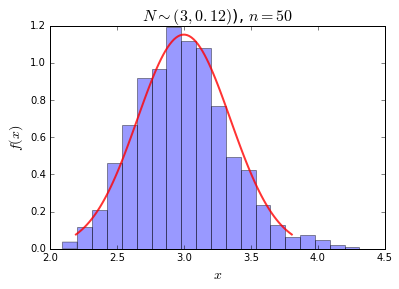

Параметры нормального распределения:
mu = 3
sigma = 0.346410161514
variance = 0.12


In [10]:
simulate_data(50)

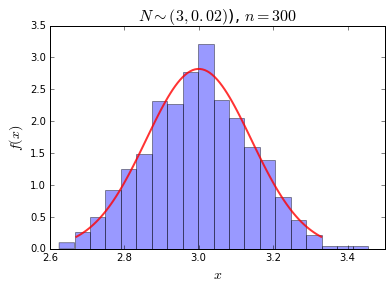

Параметры нормального распределения:
mu = 3
sigma = 0.141421356237
variance = 0.02


In [11]:
simulate_data(300)

Легко заметить, что при небольших значениях размера выборки n распределение выборочных средних похоже на нормальное распределение, однако оно обладает выраженной асимметрией и имеет большой разброс значений выборочных средних. При увеличении объема выборок распределение выборочных средних уже гораздо больше напоминает нормальное: асимметрия пропадает, гистограмма становится уже, стандартное отклонение уменьшается.